In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science','notebook'])

# Aula 04 - Interação de Lennard-Jones e Condição de Contorno Periódica

## Posições das Partículas em 2D

Vamos considerar 36 partículas colocados em uma caixa 2D com densidade de partículas $\rho \sigma^2 = N/V = 0.2$ onde $\sigma$ é o tamanho das partículas.

Número de átomos

In [2]:
Nparticles = 36

In [3]:
m = 1.0 # massa

Tamanho de cada partícula

**Ex:** Para Ar (argônio) temos
- $\sigma = 3,4\ \AA$

In [4]:
sigma = 3.4*np.ones(Nparticles) # em unidades atômicas

Densidade de partículas

In [5]:
rho = 0.2 # N/V

Tamanho da caixa em 2D

Calculado pela relação $\rho = N/L^2$ tal que $L_x = L_y = \sqrt{N/\rho}$

In [6]:
Lx = Ly = np.sqrt(Nparticles/rho)

Lx, Ly

(13.416407864998739, 13.416407864998739)

Vamos colocar os átomos de forma uniforme ao longo da caixa usando a função `meshgrid`

In [7]:
# Número de pontos em x e y
Nx = int(np.sqrt(Nparticles))
Ny = int(np.sqrt(Nparticles))
# ou seja, Nx.Ny = Nparticles

# Espaçamento entre os átomos
dx = Lx/Nx
dy = Ly/Ny

# Posições possíveis em x e y
xarray = np.arange(0.5*dx,Lx,dx)
yarray = np.arange(0.5*dy,Ly,dy)

# Cria uma grid em 2D
X,Y = np.meshgrid(xarray,yarray,indexing='ij')

# Colocando as partículas em suas posições
x0 = X.flatten()
y0 = Y.flatten()

In [8]:
x0

array([ 1.11803399,  1.11803399,  1.11803399,  1.11803399,  1.11803399,
        1.11803399,  3.35410197,  3.35410197,  3.35410197,  3.35410197,
        3.35410197,  3.35410197,  5.59016994,  5.59016994,  5.59016994,
        5.59016994,  5.59016994,  5.59016994,  7.82623792,  7.82623792,
        7.82623792,  7.82623792,  7.82623792,  7.82623792, 10.0623059 ,
       10.0623059 , 10.0623059 , 10.0623059 , 10.0623059 , 10.0623059 ,
       12.29837388, 12.29837388, 12.29837388, 12.29837388, 12.29837388,
       12.29837388])

Text(0, 0.5, 'y')

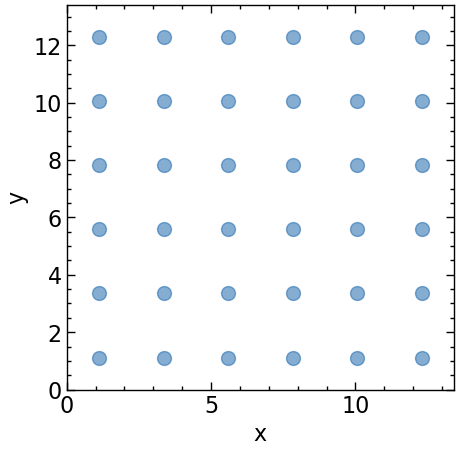

In [9]:
plt.figure(figsize=(5,5))
plt.plot(x0,y0,'o',ms=10.0,alpha=0.5)

plt.xlim(0,Lx)
plt.ylim(0,Ly)

plt.xlabel('x')
plt.ylabel('y')

## Velocidades das partículas

Da distribuição de Maxwell-Boltzmann sabemos que a distribuição de velocidades em cada direção deve ser uma gaussiana centrada em 0 e com variância associada à temperatura como dado ao longo de $x$

$$f(v_x) = \left(\frac{m}{2\pi k_B T}\right)^{1/2} \exp{\left(-\frac{m v_x^2}{2 k_B T}\right)}$$

e ao longo de $y$ 

$$f(v_y) = \left(\frac{m}{2\pi k_B T}\right)^{1/2} \exp{\left(-\frac{m v_y^2}{2 k_B T}\right)}$$

tal que a variância dessa gaussiana seja 

$$\sigma^2 = k_B T/m$$

**Vide Aula 03**

Vamos usar a função `np.random.normal` para sortear números aleatórios com uma dist gaussiana

In [10]:
# Parâmetros da função np.random.normal
# loc = média da gaussiana
# scale = desvio padrão = sqrt(variância)
# size = tamanho do array
kT = 150

v0x = np.random.normal(loc=0.0, scale=np.sqrt(kT/m),size=Nparticles)
v0y = np.random.normal(loc=0.0, scale=np.sqrt(kT/m),size=Nparticles)

In [11]:
v0x

array([  9.25668639, -14.33249365,   4.11745038,  -5.47248288,
        -3.37446337,  15.28261155,  -1.37201096,  -5.55468712,
       -24.17482978,  35.96456846, -27.25545868, -11.85056309,
       -10.91462468, -26.69437183,   6.65765863,  -5.53698053,
       -13.82321092, -16.00284976,   1.34118331, -13.74693477,
         0.10081407,   1.65533269,  19.50432869,  29.07619469,
       -19.62244654, -23.40980159,   5.50136595,  14.13421796,
        23.68925454, -20.09466819,   1.53989276,  13.42402201,
         8.37060267,   5.43719531,   5.52156049,  -2.77740999])

Text(0, 0.5, 'y')

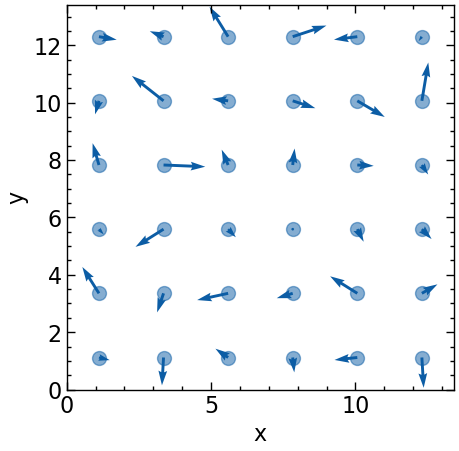

In [12]:
plt.figure(figsize=(5,5))
plt.plot(x0,y0,'o',ms=10.0,alpha=0.5) # posição das partículas
plt.quiver(x0,y0,v0x,v0y,color='C0') # vetor de velocidade

plt.xlim(0,Lx)
plt.ylim(0,Ly)

plt.xlabel('x')
plt.ylabel('y')

Energia cinética $ K = \frac{m \boldsymbol{v}^2}{2}$

In [ ]:
def energia_cinetica2d(vx,vy):
    return np.sum(0.5*m*(vx**2+vy**2))

In [14]:
K0 = energia_cinetica2d(v0x,v0y)

print(K0)

7612.856504721977


## Interação de Lennard-Jones

Para duas moléculas interagindo, podemos aproximar o potencial de interação a partir da interação de Lennard-Jones dada por 

$$u(r_{ij}) = 4\epsilon\left[ \left(\frac{\sigma}{r_{ij}} \right)^{12}-\left(\frac{\sigma}{r_{ij}} \right)^{6}\right] $$

com $\epsilon$ sendo uma energia de interação e $\sigma$ uma distância de aproximação mínima. 

**Ex:** Para Ar (argônio) temos
- $\epsilon/k_B = 119,8$ K


In [15]:
epsilon = 119.8*np.ones(Nparticles)

O potencial de LJ

In [16]:
def ulj(r,epsilon=1.0,sigma=1.0):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

(-1.0, 1.0)

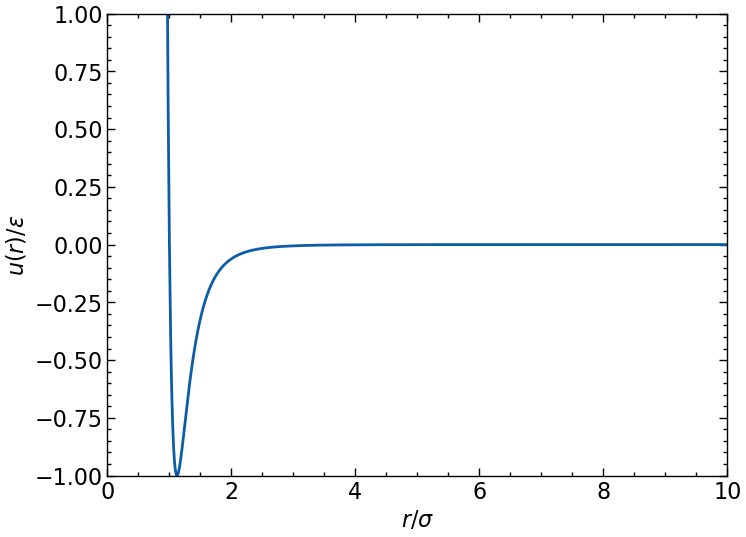

In [17]:
r = np.arange(0.1,10.0,0.01)

plt.plot(r,ulj(r))

plt.xlabel(r'$r/\sigma$')
plt.ylabel(r'$u(r)/\epsilon$')

plt.xlim(0,10.0)
plt.ylim(-1.0,1.0)

Podemos definir uma distãncia máxima `rcut` (um cutoff) tal que a interação de LJ seja nula a partir dela, ou seja, $ u(r) = 0$ se $ r> r_\text{cut}$.

In [18]:
rcut = 2.5

Derivada do potencial de LJ: $ \frac{\partial u(r)}{\partial r}$

In [19]:
def duljdr(r,epsilon=1.0,sigma=1.0):
    return -4*epsilon*((12*(sigma/r)**12-6*(sigma/r)**6)/r)

A energia interna do gás é dada pela soma de interação entre os pares
$$U_{int} = \frac{1}{2}\sum_i \sum_{j \neq i} u(|\boldsymbol{r}_i-\boldsymbol{r}_j|)= \sum_i \sum_{j > i} u(|\boldsymbol{r}_i-\boldsymbol{r}_j|)$$

Vamos calcular a força total que atua sobre a partícula $i$ a partir do gradiente da energia potencial 

$$ \boldsymbol{F}_i = - \nabla_i U_{int} = - \frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{\partial r_{kj}}{\partial \boldsymbol{r}_i}=-\frac{1}{2}\sum_{k} \sum_{j \neq k} \frac{\partial u(r_{kj})}{\partial r_{kj}} \frac{(\delta_{ki}-\delta_{ij})(\boldsymbol{r}_k -\boldsymbol{r}_j)}{ |\boldsymbol{r}_k-\boldsymbol{r}_j|}$$

de modo que 

$$ \boldsymbol{F}_i = -\sum_{j \neq i} \frac{\partial u(r_{ij})}{\partial r_{ij}} \frac{\boldsymbol{r}_{ij}}{ \boldsymbol{r}_{ij}}$$

com $\boldsymbol{r}_{ij} = \boldsymbol{r}_{i} - \boldsymbol{r}_{j}$ sendo o vetor posição relativa da partícula $i$ vista da partícula $j$. 

Definindo a função que calcula a aceleração de cada partícula e a energia interna do sistema

In [20]:
def lennardjones2d(x,y,epsilon,sigma):
    ax = np.zeros_like(x)
    ay = np.zeros_like(y)
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            # calcula distancia entre duas particulas
            rx = x[i] - x[j]
            ry = y[i] - y[j]
            # calcula modulo da distancia 
            r = np.sqrt(rx**2 + ry**2)
            # regra de combinação de Lorenz-Berthelot
            epsilonij = np.sqrt(epsilon[i]*epsilon[j])
            sigmaij = 0.5*(sigma[i]+sigma[j])
            # Vamos considerar somente interação dentro do raio de corte
            if r < rcut*sigmaij:
                # calcula a derivada do potencial 
                dudr = duljdr(r,epsilonij,sigmaij)
                # calcula aceleração na particula i 
                ax[i] += -dudr*rx/r
                ay[i] += -dudr*ry/r
                # calcula aceleração na particula j usando 3ª Lei de Newton 
                ax[j] += dudr*rx/r
                ay[j] += dudr*ry/r
                # calcula energia interna
                U += ulj(r,epsilonij,sigmaij)
    return ax, ay, U

Considerando os parâmetros do potencial de LJ e calculando a aceleração inicial

In [21]:
a0x, a0y, U0 = lennardjones2d(x0,y0,epsilon,sigma)

print(U0)

4048027.2196759707


In [22]:
U0 + K0

4055640.0761806928

Text(0, 0.5, 'y')

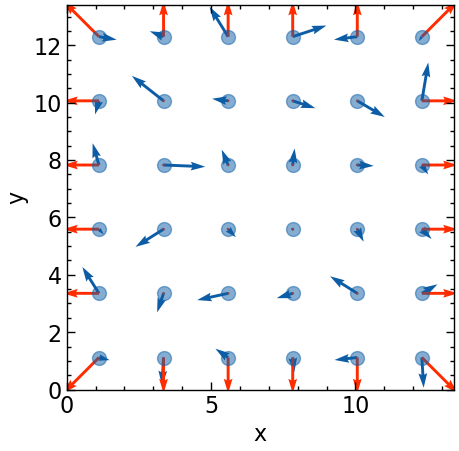

In [23]:
plt.figure(figsize=(5,5))
plt.plot(x0,y0,'o',ms=10.0,alpha=0.5) # posição das partículas
plt.quiver(x0,y0,v0x,v0y,color='C0') # vetor de velocidade
plt.quiver(x0,y0,a0x,a0y,color='C3') # vetor de aceleração

plt.xlim(0,Lx)
plt.ylim(0,Ly)

plt.xlabel('x')
plt.ylabel('y')

## Condição de Contorno Períodica

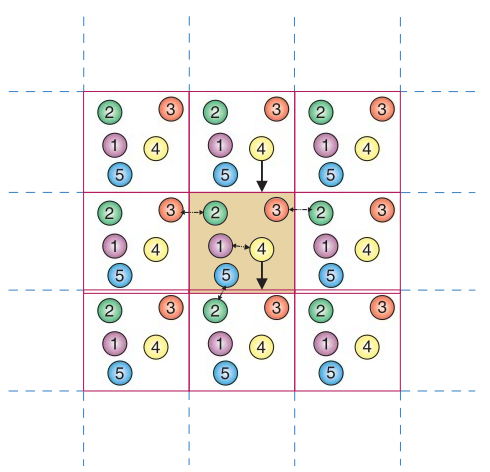

- Se x<0 faremos $ x = x + L$

- Se x>L faremos $ x = x- L$

In [24]:
def pbc(x,L):
    if x < 0:
        xnew = x + L
    elif x > L: 
        xnew = x - L
    else:
        xnew = x  
    return xnew

In [25]:
pbc(50.0,Lx) # fora da caixa pela direita

36.58359213500126

In [26]:
pbc(-10.0,Lx) # fora da caixa pela esquerda

3.416407864998739

In [27]:
pbc(10.0,Lx) # dentro da caixa

10.0

A função `%` faz o mesmo trabalho

In [28]:
50.0 % Lx # fora da caixa pela direita

9.750776405003784

In [29]:
-10.0 % Lx # fora da caixa pela esquerda

3.416407864998739

In [30]:
10.0 % Lx  # dentro da caixa

10.0

Função `rint` permite valores negativos e positivos

In [31]:
-10.0 - np.rint(-10.0/Lx)*Lx 

3.416407864998739

In [32]:
50.0 - np.rint(50.0/Lx)*Lx 

-3.6656314599949553

Incluindo condição de contorno periódica na interação de lennard-jones

In [33]:
def lennardjones2d_periodica(x,y,epsilon,sigma):
    ax = np.zeros_like(x)
    ay = np.zeros_like(y)
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            # calcula distancia entre duas particulas
            rx = x[i] - x[j]
            ry = y[i] - y[j]
            # testa condição de contorno periodica
            rx -= np.rint(rx/Lx)*Lx # em x
            ry -= np.rint(ry/Ly)*Ly # em y
            # calcula modulo da distancia 
            r = np.sqrt(rx**2 + ry**2)
            # regra de combinação de Lorenz-Berthelot
            epsilonij = np.sqrt(epsilon[i]*epsilon[j])
            sigmaij = 0.5*(sigma[i]+sigma[j])
            # Vamos considerar somente interação dentro do raio de corte
            if r < rcut*sigmaij:
                # calcula a derivada do potencial 
                dudr = duljdr(r,epsilonij,sigmaij)
                # calcula aceleração na particula i 
                ax[i] += -dudr*rx/r
                ay[i] += -dudr*ry/r
                # calcula aceleração na particula j usando 3ª Lei de Newton 
                ax[j] += dudr*rx/r
                ay[j] += dudr*ry/r
                # calcula energia interna
                U += ulj(r,epsilonij,sigmaij)
    return ax, ay, U

In [34]:
a0x, a0y, U0 = lennardjones2d_periodica(x0,y0,epsilon,sigma)

print(U0)

4858987.476522258


In [35]:
U0 + K0

4866600.333026979

## Generalizando para 3D

In [36]:
# Nparticles = 216
Nparticles = 216

rho = 0.6

Vol = Nparticles/rho

Lx = Ly = Lz = np.power(Vol,1/3.0)*sigma.max()

sigma = 3.4*np.ones(Nparticles) 
epsilon = 119.8*np.ones(Nparticles)

In [37]:
# Número de pontos em x e y
Nx = int(np.round(np.power(Nparticles,1/3)))
Ny = int(np.round(np.power(Nparticles,1/3)))
Nz = int(np.round(np.power(Nparticles,1/3)))
# ou seja, Nx.Ny = Nparticles

# Espaçamento entre os átomos
dx = Lx/Nx
dy = Ly/Ny
dz = Lz/Nz

# Posições possíveis em x e y
xarray = np.arange(0.5*dx,Lx,dx)
yarray = np.arange(0.5*dy,Ly,dy)
zarray = np.arange(0.5*dz,Lz,dz)

# Cria uma grid em 3D
X,Y, Z = np.meshgrid(xarray,yarray,zarray,indexing='ij')

# Colocando as partículas em suas posições
x0 = X.flatten()
y0 = Y.flatten()
z0 = Z.flatten()

In [38]:
Nx

6

In [39]:
# scale = sigma
kT = 150

v0x = np.random.normal(loc=0.0, scale=np.sqrt(kT/m),size=Nparticles)
v0y = np.random.normal(loc=0.0, scale=np.sqrt(kT/m),size=Nparticles)
v0z = np.random.normal(loc=0.0, scale=np.sqrt(kT/m),size=Nparticles)

def energia_cinetica3d(vx,vy,vz):
    return np.sum(0.5*m*(vx**2+vy**2+vz**2))

K0 = energia_cinetica3d(v0x,v0y,v0z)

In [40]:
def lennardjones3d_periodica(x,y,z,epsilon,sigma):
    ax = np.zeros_like(x)
    ay = np.zeros_like(y)
    az = np.zeros_like(z)
    U = 0.0
    for i in range(Nparticles):
        for j in range(i+1,Nparticles):
            # calcula distancia entre duas particulas
            rx = x[i] - x[j]
            ry = y[i] - y[j]
            rz = z[i] - z[j]
            # testa condição de contorno periodica
            rx -= np.rint(rx/Lx)*Lx # em x
            ry -= np.rint(ry/Ly)*Ly # em y
            rz -= np.rint(rz/Lz)*Lz # em y
            # calcula modulo da distancia 
            r = np.sqrt(rx**2 + ry**2 + rz**2)
            # regra de combinação de Lorenz-Berthelot
            epsilonij = np.sqrt(epsilon[i]*epsilon[j])
            sigmaij = 0.5*(sigma[i]+sigma[j])
            # Vamos considerar somente interação dentro do raio de corte
            if r < rcut*sigmaij:
                # calcula a derivada do potencial 
                dudr = duljdr(r,epsilonij,sigmaij)
                # calcula aceleração na particula i 
                ax[i] += -dudr*rx/r
                ay[i] += -dudr*ry/r
                az[i] += -dudr*rz/r
                # calcula aceleração na particula j usando 3ª Lei de Newton 
                ax[j] += dudr*rx/r
                ay[j] += dudr*ry/r
                az[j] += dudr*rz/r
                # calcula energia interna
                U += ulj(r,epsilonij,sigmaij)
    return ax, ay, az, U

In [41]:
a0x, a0y, a0z, U0 = lennardjones3d_periodica(x0,y0,z0,epsilon,sigma)

In [42]:
K0, U0, K0+U0

(44964.39172406316, -105417.14594249892, -60452.75421843575)